In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [5]:
(x_train,y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
x_train.shape
y_train.shape

(60000,)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,  activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(x_train, y_train,epochs=100,verbose=2, callbacks=callback) 


Epoch 1/100
1875/1875 - 3s - loss: 0.2565 - accuracy: 0.9267
Epoch 2/100
1875/1875 - 3s - loss: 0.1110 - accuracy: 0.9674
Epoch 3/100
1875/1875 - 3s - loss: 0.0763 - accuracy: 0.9772
Epoch 4/100
1875/1875 - 3s - loss: 0.0572 - accuracy: 0.9824
Epoch 5/100
1875/1875 - 3s - loss: 0.0441 - accuracy: 0.9867
Epoch 6/100
1875/1875 - 3s - loss: 0.0345 - accuracy: 0.9893
Epoch 7/100
1875/1875 - 3s - loss: 0.0279 - accuracy: 0.9912
Epoch 8/100
1875/1875 - 3s - loss: 0.0217 - accuracy: 0.9937
Epoch 9/100
1875/1875 - 3s - loss: 0.0191 - accuracy: 0.9941
Epoch 10/100
1875/1875 - 3s - loss: 0.0156 - accuracy: 0.9953
Epoch 11/100
1875/1875 - 3s - loss: 0.0140 - accuracy: 0.9957
Epoch 12/100
1875/1875 - 3s - loss: 0.0104 - accuracy: 0.9972
Epoch 13/100
1875/1875 - 3s - loss: 0.0094 - accuracy: 0.9971
Epoch 14/100
1875/1875 - 3s - loss: 0.0085 - accuracy: 0.9973
Epoch 15/100
1875/1875 - 3s - loss: 0.0073 - accuracy: 0.9977
Epoch 16/100
1875/1875 - 3s - loss: 0.0079 - accuracy: 0.9972
Epoch 17/100
1875

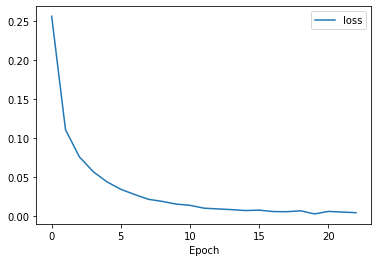

In [ ]:
plt.xlabel('Epoch')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1221 - accuracy: 0.9778


[0.12208820879459381, 0.9778000116348267]

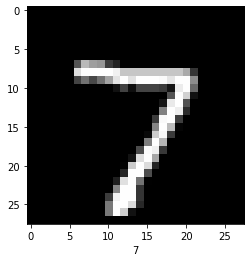

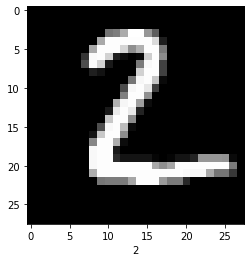

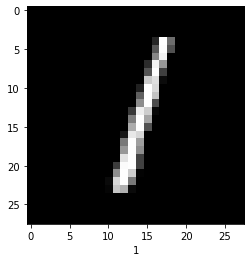

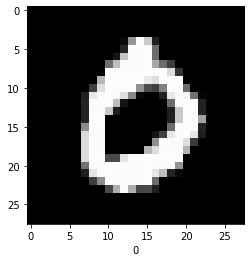

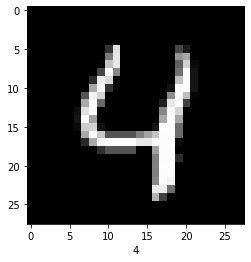

In [ ]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), 'gray')
    plt.xlabel(y_predicted_labels[i])
    plt.show()


(1, 28, 28)


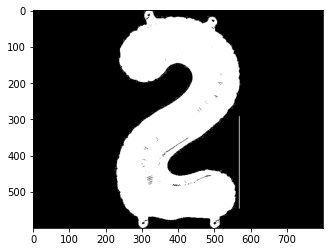

In [ ]:
import cv2
img = cv2.imread("/content/drive/MyDrive/AI_SGROUP/Machine_Learning/Tensorflow/num2.jpg",cv2.IMREAD_GRAYSCALE )
thresh = 127
gray = cv2.threshold(img, 250, thresh, 1)[1]
plt.imshow(gray, 'gray')
gray = np.expand_dims(gray, 2)
gray = cv2.resize(gray, (28,28))
gray = gray.reshape((-1,28,28))
gray = gray/255.0
print(gray.shape)
plt.show()


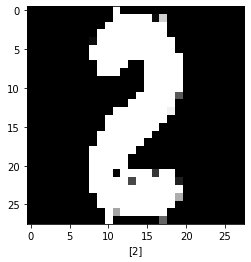

In [ ]:
y_pred = model.predict(gray)
y_pred_labels = [np.argmax(i) for i in y_pred]
plt.imshow(gray.reshape(28,28), 'gray')
plt.xlabel(y_pred_labels)
plt.show()